In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import random

In [2]:
train_emnist = pd.read_csv("extended_emnist/emnist-byclass-train.csv", header=None)
test_emnist = pd.read_csv("extended_emnist/emnist-byclass-test.csv", header=None)
emnist_tr = pd.read_csv("thedataset/version2.csv", header=None)


In [3]:
train_emnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_emnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
emnist_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> This dataset has been provided by 
---
"G. Ediboğlu Bartos, Y. Hoscan, A. Kauer, and É. Hajnal, “A Multilingual Handwritten Character Dataset: T-H-E Dataset,” Acta Polytechnica Hungarica, 2020.(under acceptance)"
> The classes this dataset include ç-27 Ç-66 ğ-28 Ğ-67 ı-29 İ-68 ş-30 Ş-69 ö-31 Ö-70 ü-32 Ü-71 but the classes 66 and 69 which are capital Ç and Ş missing.

> I will be using another dataset to close the gaps and widen the training set.

In [6]:
len(train_emnist.columns), len(train_emnist), train_emnist.shape

(785, 697932, (697932, 785))

> This simply indicates we have 784 values which one of them is the class value. We also have '697931' of them. Which is the same as saying the size of our dataset.

In [7]:
len(test_emnist.columns), len(test_emnist), test_emnist.shape

(785, 116323, (116323, 785))

In [8]:
len(emnist_tr.columns), len(emnist_tr), emnist_tr.shape

(785, 20000, (20000, 785))

In [9]:
classes_emnist = train_emnist[0].unique()
classes_emnist.sort()
classes_emnist

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

> These are the classes we have right now.

In [10]:
train_emnist, test_emnist = train_emnist.loc[train_emnist[0] >= 10 ], test_emnist.loc[test_emnist[0] >= 10 ]
print("Drop rows based on column value:\n", train_emnist)

Drop rows based on column value:
         0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        35    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        36    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        22    0    0    0    0    0    0    0    0    0  ...    0    0    0   
5        38    0    0    0    0    0    0    0    0    0  ...    0    0    0   
8        47    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
697926   23    0    0    0    0    0    0    0    0    0  ...    0    0    0   
697927   40    0    0    0    0    0    0    0    0    0  ...    0    0    0   
697928   47    0    0    0    0    0    0    0    0    0  ...    0    0    0   
697930   11    0    0    0    0    0    0    0    0    0  ...    0    0    0   
697931   22    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     

> We dropped the first 10 classes due to them being digits. I already utilized a digit based ML model.

In [11]:
train_emnist[0] = train_emnist[0] - 10
test_emnist[0] = test_emnist[0] - 10
classes_emnist = train_emnist[0].unique()
classes_emnist.sort()
classes_emnist

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int64)

> We then also adjusted the classes so it start from 0 again.

In [12]:
def process_image(row):
    # Get the image data, ignore the first value (the class)
    image_data = np.array(row[1:]).reshape(28, 28)
    
    # Rotate the image -90 degrees
    rotated_image = ndimage.rotate(image_data, -90)

    # Flip the image
    flipped_image = np.fliplr(rotated_image)
    
    return pd.Series(np.append(row[0], flipped_image.flatten()))
train_emnist = train_emnist.apply(process_image, axis=1)
test_emnist = test_emnist.apply(process_image, axis=1)


> Extended EMNIST "byclass" seem to have the values misput as seen in the example. The code seen simply fixes that by rotating and flipping the images accordingly.

![alt text](plot-images/unflipped-emnist-images.png)

In [13]:
def process_image(row):
    # Get the image data, ignore the first value (the class), transpoze the values.
    image_data = np.array(row[1:]).reshape(28, 28).T
     
    return pd.Series(np.append(row[0], image_data.flatten()))
emnist_tr = emnist_tr.apply(process_image, axis=1)


> This code simply transpozes the data because just like the first dataset second dataset has also mispositionings.

In [14]:
mapping_emnist_tr = {27: 52, 28: 53, 67: 54, 29: 55, 68: 56, 30: 57, 31: 58, 70: 59, 32: 60, 71: 61}
emnist_tr[0] = emnist_tr[0].map(mapping_emnist_tr)
classes_emnist_tr = emnist_tr[0].unique()
classes_emnist_tr.sort()
classes_emnist_tr

array([52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

> We map the classes accordingly for concatanation later.

In [15]:
len(train_emnist), len(test_emnist)

(352897, 58405)

In [16]:
emnist_tr_train = emnist_tr.sample(frac = 0.8, random_state = 200)
emnist_tr_test = emnist_tr.drop(emnist_tr_train.index)
emnist_tr_test = emnist_tr_test.sample(frac=1, random_state=200).reset_index(drop=True)

> We split the class as train and testing modules.

In [17]:
len(emnist_tr_train), len(emnist_tr_test)

(16000, 4000)

In [18]:
train_emnist_last = pd.concat([train_emnist, emnist_tr_train], ignore_index=True)
test_emnist_last = pd.concat([test_emnist, emnist_tr_test])

> We concatanates the datasets based on them being train or test versions.

In [19]:
len(train_emnist_last), len(test_emnist_last)

(368897, 62405)

In [20]:
classes_emnist_last = train_emnist_last[0].unique()
classes_emnist_last.sort()
classes_emnist_last

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

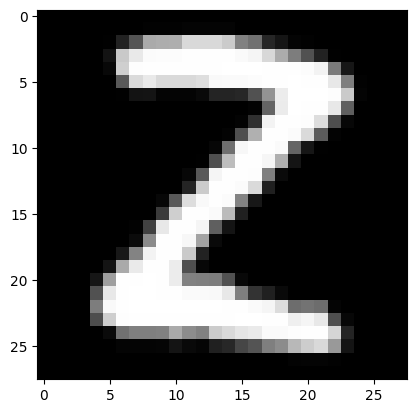

In [21]:
image_data = train_emnist_last.iloc[0, 1:]

# Reshape the data into a 28x28 array
image_data = np.array(image_data).reshape(28, 28)

# Use matplotlib to display the image
plt.imshow(image_data, cmap='gray')
plt.show()

In [22]:
train_emnist_last.iloc[2][0]

12.0

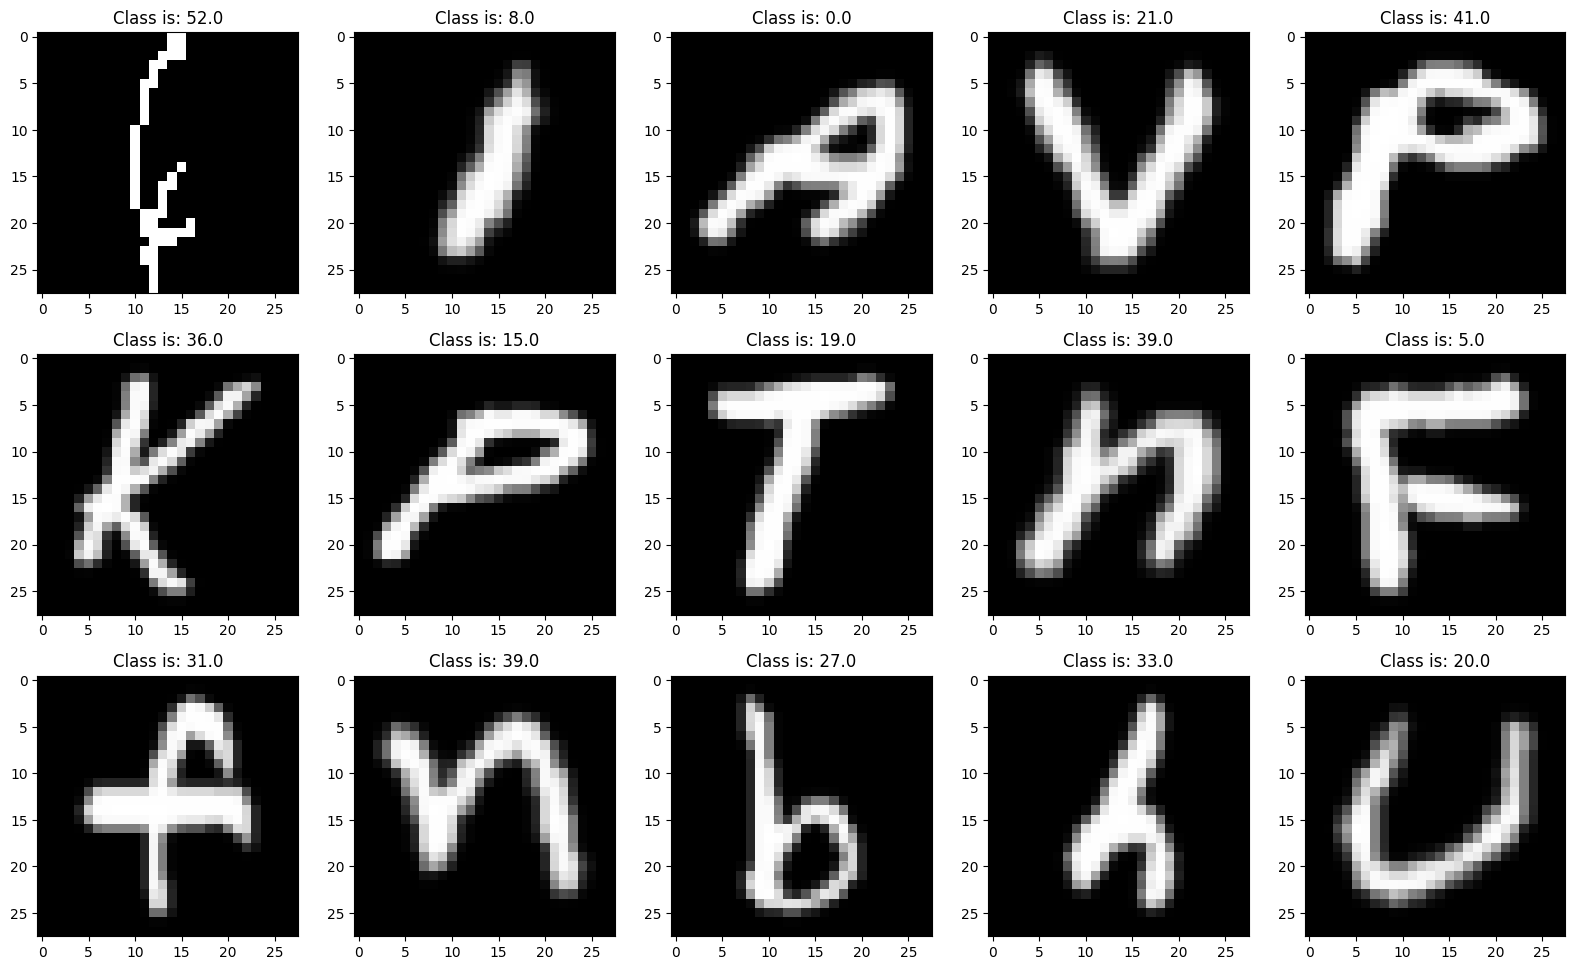

In [26]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        number = random.randint(0, len(train_emnist_last))
        image_data = train_emnist_last.iloc[number, 1:]
        image_data = np.array(image_data).reshape(28, 28)
        plt.subplot(5, 5,idx+1)
        plt.imshow(image_data,cmap='gray')
        plt.title(f"Class is: {train_emnist_last.iloc[number][0]
}")
    
    plt.tight_layout()

Show_example_digits()

In [27]:
train_emnist_last.to_csv("final_dataset/train_dataset.csv")
test_emnist_last.to_csv("final_dataset/test_dataset.csv")

> We save the datasets for later use.